#### <strong>第二次作品：SVD 與影像特徵實驗</strong>
學號：711233115

姓名：許政揚
<hr>

 <font color=skyblue>作品目標</font>：
- 比較不同大小的小區域（patch）對於圖像壓縮的效果，並觀察在相同的壓縮比率下，不同重組方式對於還原後圖像的品質影響。

- 利用灰度圖像並進行 SVD 分解，以及對圖像進行加密，並使用相同的密鑰對其進行解密。
根據不同奇異值的數量，觀察加密後的圖像與解密後的圖像之間的差異。擴展加密和解密函數，再對其他灰度圖像進行加密和解密，並觀察不同圖像之間的加密效果。

- 加載手寫數字數據集，並隨機展示其中的圖像，以確定能掌握將要處理的影像及其資料型態。

- 對手寫數字圖像進行 SVD 壓縮，並根據不同的壓縮比率，比較原始圖像和壓縮後還原的圖像。

<hr>

#### <strong><font color=cornflowerblue>Lesson6習題1</font></strong> 

利用 SVD 的 “Rank q approximation”，將圖像 X 壓縮並保持圖像的品質。

在不同切割大小下對於 X 進行重組安排與 “Rank q approximation”，比較在同樣的壓縮比之下，哪種切割大小還原圖像的結果最好。

#### <strong><font color=lightsteelblue>1. 原始影像</font></strong> 

以下程式碼為匯入Lenna圖，並通過SVD對圖像進行壓縮，然後顯示不同壓縮倍數下的重建圖像。

可以觀察到，壓縮倍數在2倍、4倍、8倍之間重建後的圖像之差別。在2倍壓縮倍數下，圖像最接近原圖，反之則如在8倍壓縮倍數下之結果。
這是因為當壓縮倍數增加時，意味著我們保留的特徵數量更少，因此重建的圖像會失去一些細節和資訊。換句話說，壓縮倍數增加會導致更多的資訊丟失，因此重建圖像的質量會下降，看起來更加模糊。

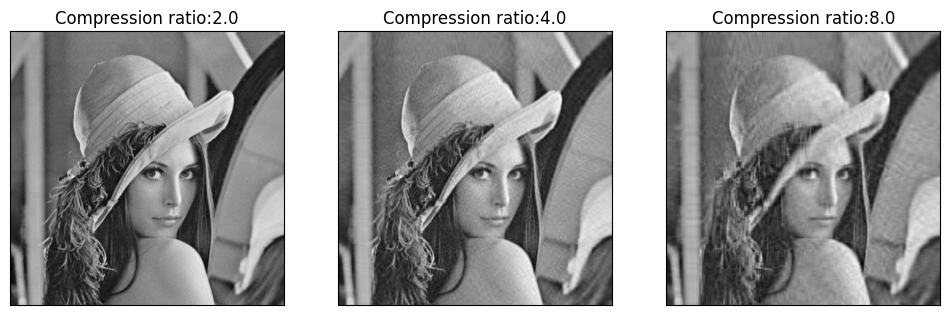

In [6]:
import numpy as np
from numpy.linalg import svd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
imgfile = "/Users/andrewhsu/Desktop/Shallow ML/Lenna.png" # 512x512x3 
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
 X = np.mean(X, axis=2) # convert RGB to grayscale
N, p = X.shape
U, E, VT = svd(X, full_matrices = False)
q = np.array([p/4, p/8, p/16]).astype('int')
fig, ax = plt.subplots(1, 3, figsize=(12, 4)) 
for i, r in enumerate(q):
 Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
 ax[i].imshow(Xq, cmap = 'gray') 
 ax[i].set_title('Compression ratio:{}'.format(p/r/2)) 
 ax[i].set_xticks([])
 ax[i].set_yticks([]) 
plt.show()

In [123]:
def montage(A, m, n): 
  '''
  Create a montage matrix with mn images
  Inputs:
  A: original pxN image matrix with N images (p pixels), m, n: m rows & n columns, total mn images
  Output:
  M: montage matrix containing mn images
  '''
  sz = np.sqrt(A.shape[0]).astype('int') # image size sz 
  M = np.zeros((m*sz, n*sz)) # montage image
  for i in range(m) :
   for j in range(n) :
    M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
      A[:, i*n+j].reshape(sz, sz)
  return M

#### <strong><font color=lightsteelblue>2. 切割大小：8x8 / per patch</font></strong> 

以下程式碼為匯入Lenna圖，並將圖像切割成每個區域大小為 8x8 像素的小區域（patch）。並通過SVD對圖像進行降維與壓縮，然後顯示不同壓縮倍數下的重建圖像。

可以觀察到在切割大小為 8x8 像素之下時，不同壓縮倍數之下的圖像重組結果相差不大。

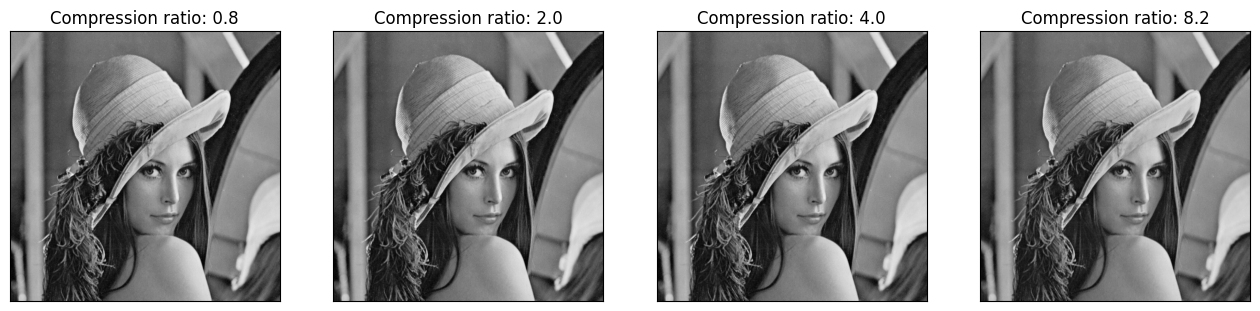

In [37]:
import numpy as np
from numpy.linalg import svd
import skimage.util as skutil
from skimage import io
import matplotlib.pyplot as plt

imgfile = "/Users/andrewhsu/Desktop/Shallow ML/Lenna.png" # 512x512x3
X = io.imread(imgfile, as_gray=True)

# 將圖像切割小區域
p, N = X.shape # p by N, p = 512, N = 512
patch_sz = 8
p_patch = patch_sz ** 2 
N_patch = int(N * p / p_patch)
patches = skutil.view_as_windows(X, (patch_sz, patch_sz), step=patch_sz)

M = np.empty((patch_sz * patch_sz, 0))  # initialize M as an empty array with shape (patch_sz*patch_sz,0)

for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j].reshape(-1, 1)
        M = np.append(M, patch, axis=1)  # append the reshaped patch to M
 
U, E, VT = svd(M, full_matrices=False)
compression_ratios = [0.8, 2.0, 4.0, 8.2]
fig, ax = plt.subplots(1, len(compression_ratios), figsize=(16, 4))
for i, ratio in enumerate(compression_ratios):
    r = N * p / (ratio * (p + N))
    q = int(min(r, p * N))
    Mq = U[:, :q] @ np.diag(E[:q]) @ VT[:q, :] 
    ax[i].imshow(montage(Mq, int(p / patch_sz), int(p / patch_sz)), cmap='gray')
    ax[i].set_title('Compression ratio: {:.1f}'.format(ratio))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()


#### <strong><font color=lightsteelblue>3. 切割大小：16x16 / per patch</font></strong> 

以下程式碼為匯入Lenna圖，並將圖像切割成每個區域大小為 16x16 像素的小區域（patch）。並通過SVD對圖像進行降維與壓縮，然後顯示不同壓縮倍數下的重建圖像。
可以觀察到在切割大小為 16x16 像素之下時，不同壓縮倍數之下的圖像重組結果有較明顯的變化。在壓縮倍數增加時，圖像開始變得較模糊了一些。

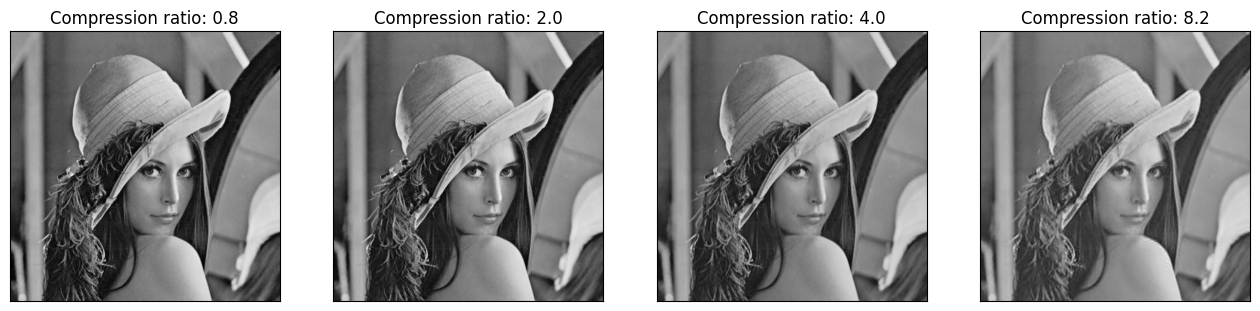

In [3]:
import numpy as np
from numpy.linalg import svd
import skimage.util as skutil
from skimage import io
import matplotlib.pyplot as plt

imgfile = "/Users/andrewhsu/Desktop/Shallow ML/Lenna.png" # 512x512x3
X = io.imread(imgfile, as_gray = True)

# 將圖像切割小區域
p, N = X.shape # p by N, p = 512, N = 512
patch_sz = 16
p_patch = patch_sz ** 2 
N_patch = int(N * p / p_patch)
patches = skutil.view_as_windows(X, (patch_sz, patch_sz), \
                                 step=patch_sz)

M = np.empty((patch_sz*patch_sz, 0))  # initialize M as an empty array with shape (patch_sz*patch_sz,0)

for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j].reshape(-1, 1)
        M = np.append(M, patch, axis=1)  # append the reshaped patch to M
 
U, E, VT = svd(M, full_matrices = False)
q = np.array([256, 102, 51, 25]).astype('int')
# q = np.array([p/4, p/8, p/16]).astype('int')
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i, r in enumerate(q):
    Mq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
    ax[i].imshow(montage(Mq, int(p/patch_sz), int(p/patch_sz)), cmap = 'gray')
    ratio = N * p / (U.shape[0] + VT.shape[1]) / r
    ax[i].set_title('Compression ratio: {:.1f}'.format(ratio))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

#### <strong><font color=lightsteelblue>4. 切割大小：32x32 / per patch</font></strong> 

以下程式碼為匯入Lenna圖，並將圖像切割成每個區域大小為 32x32 像素的小區域（patch）。並通過SVD對圖像進行降維與壓縮，然後顯示不同壓縮倍數下的重建圖像。
可以觀察到在切割大小為 32x32 像素之下時，不同壓縮倍數之下的圖像重組結果有相當明顯的差距。能夠立刻看出在較高壓縮倍數之下，圖像模糊了許多。


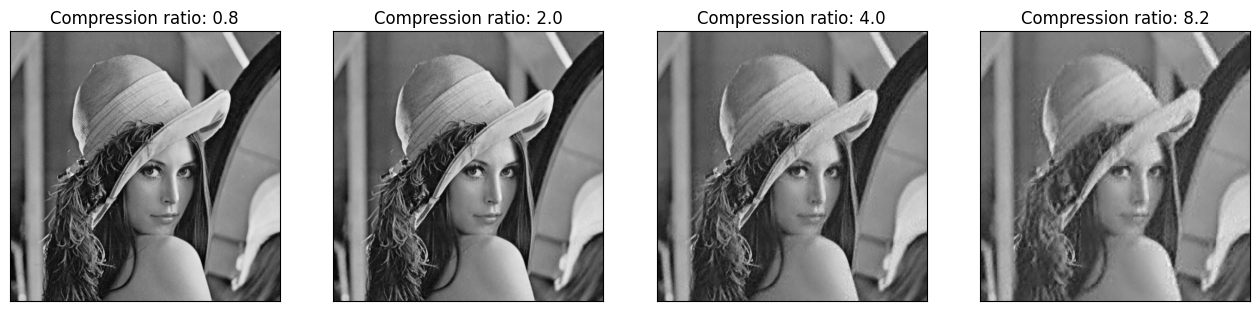

In [5]:
import numpy as np
from numpy.linalg import svd
import skimage.util as skutil
from skimage import io
import matplotlib.pyplot as plt

imgfile = "/Users/andrewhsu/Desktop/Shallow ML/Lenna.png" # 512x512x3
X = io.imread(imgfile, as_gray = True)

# 將圖像切割小區域
p, N = X.shape # p by N, p = 512, N = 512
patch_sz = 32
p_patch = patch_sz ** 2 
N_patch = int(N * p / p_patch)
patches = skutil.view_as_windows(X, (patch_sz, patch_sz), \
                                 step=patch_sz)

M = np.empty((patch_sz*patch_sz, 0))  # initialize M as an empty array with shape (patch_sz*patch_sz,0)

for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j].reshape(-1, 1)
        M = np.append(M, patch, axis=1)  # append the reshaped patch to M
 
U, E, VT = svd(M, full_matrices = False)
q = np.array([256, 102, 51, 25]).astype('int')
# q = np.array([p/4, p/8, p/16]).astype('int')
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i, r in enumerate(q):
    Mq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
    ax[i].imshow(montage(Mq, int(p/patch_sz), int(p/patch_sz)), cmap = 'gray')
    ratio = N * p / (U.shape[0] + VT.shape[1]) / r
    ax[i].set_title('Compression ratio: {:.1f}'.format(ratio))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

#### <strong>觀察：</strong>

透過上述程式碼的結果，發現在固定壓縮倍數在 0.8、2.0、4.0、8.2 之下，切割大小越小，圖像重組還原後的品質越高；相反的，切割大小越大，圖像重組還原後的品質越則越低。

因爲將原始圖像切割成較小的塊，SVD計算的矩陣也相對較小。可以降低計算成本並提高效率，同時還能在執行SVD時減少記憶體需求。而將圖像分割成小區域後，可以更好地捕捉特徵，因為每個小區域更可能包含一個或多個特徵。因此我反應在切割大小為 8x8 時圖像的品質與最好，反之在切割大小為 32x32 時圖像品質最差。

#### <strong><font color=lightsteelblue>5. 其他想法-切割大小：64x64 / per patch</font></strong> 

以下程式碼為匯入Lenna圖，並將圖像切割成每個區域大小為 64x64 像素的小區域（patch）。並通過SVD對圖像進行降維與壓縮，然後顯示不同壓縮倍數下的重建圖像。

可以觀察到將切割大小從 32x32 改為 64x64 時，壓縮倍數會改變。這是因為影像被切割成的小區塊大小影響了矩陣的奇異值分解結果，進而影響了壓縮倍數。

但是透過與上述程式碼的結果比較，在切割大小 64x64 且壓縮倍數為 2.5 時的影像重構的結果已經比在切割大小 32x32 且壓縮倍數為 8.2 時的影像重構結果模糊了許多。


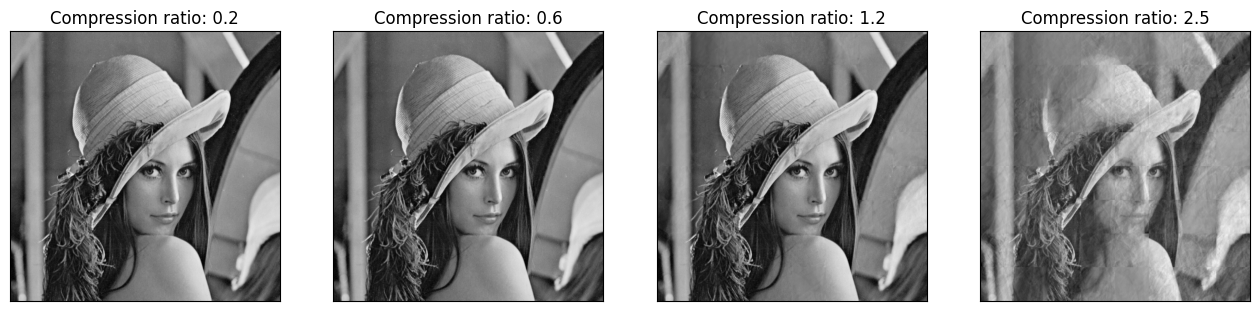

In [124]:
import numpy as np
from numpy.linalg import svd
import skimage.util as skutil
from skimage import io
import matplotlib.pyplot as plt

imgfile = "/Users/andrewhsu/Desktop/Shallow ML/Lenna.png" # 512x512x3
X = io.imread(imgfile, as_gray = True)

# 將圖像切割小區域
p, N = X.shape # p by N, p = 512, N = 512
patch_sz = 64
p_patch = patch_sz ** 2 
N_patch = int(N * p / p_patch)
patches = skutil.view_as_windows(X, (patch_sz, patch_sz), \
                                 step=patch_sz)

M = np.empty((patch_sz*patch_sz, 0))  # initialize M as an empty array with shape (patch_sz*patch_sz,0)

for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j].reshape(-1, 1)
        M = np.append(M, patch, axis=1)  # append the reshaped patch to M
 
U, E, VT = svd(M, full_matrices = False)
q = np.array([256, 102, 51, 25]).astype('int')
# q = np.array([p/4, p/8, p/16]).astype('int')
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i, r in enumerate(q):
    Mq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
    ax[i].imshow(montage(Mq, int(p/patch_sz), int(p/patch_sz)), cmap = 'gray')
    ratio = N * p / (U.shape[0] + VT.shape[1]) / r
    ax[i].set_title('Compression ratio: {:.1f}'.format(ratio))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

<hr>

#### <strong><font color=cornflowerblue>Lesson6習題2</font></strong> 

載入手寫數字圖像檔案："minst_784" 其中以 70000 張手寫圖像為例，每個數字約 7000 字。

以下程式碼為讀取所下載的手寫數字資料。

In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
 
mnist = loadmat("/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/mat/mnist-original.mat")
X = mnist["data"]
y = mnist["label"][0]


以下程式碼為從讀入之資料檔中，指定顯示其中一個第i行的數字。

在此處以 i=50000 為例，顯示的數字為8。

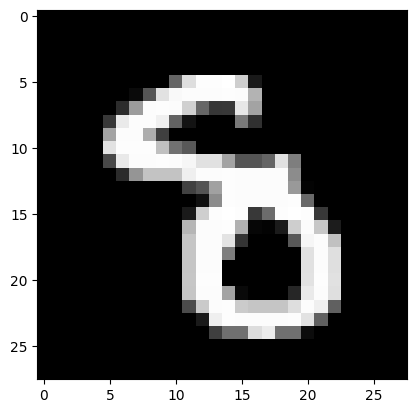

In [60]:
import matplotlib.pyplot as plt 
import numpy as np
i=50000
img = X[:, i]
sz = np.sqrt(len(img)).astype('int') 
plt.imshow(np.array(img).reshape(sz, sz), cmap='gray') 
plt.show()

以下程式碼所呈現的是從載入之資料庫中，針對 0~9 隨機各自抽取50個數字並合成 10 張 5x10 的 motage 圖，且重複隨機抽取 2 次。

如下圖中左側共兩排含 0~9 的數字各 50 個 與圖中右側兩排含 0~9 的數字各 50 個，分別是第一次與第二次隨機抽取的結果。

因為是隨機抽取且取後放回，因此每一次執行程式碼後的結果都不相同。

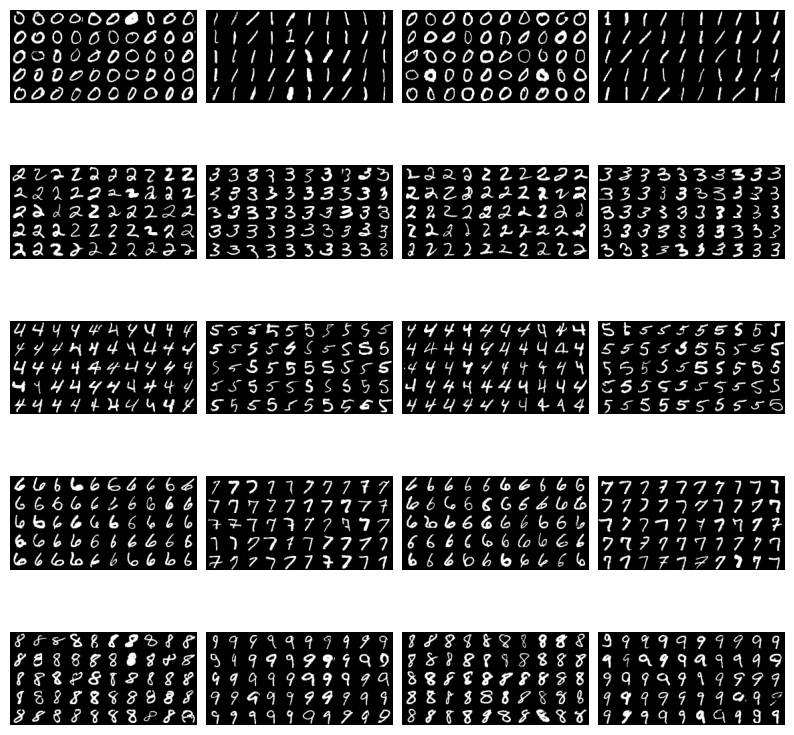

In [45]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# 載入 MNIST 數據集
mnist = loadmat("/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/mat/mnist-original.mat")
X = mnist["data"]
y = mnist["label"][0]

# 創建一個 5 行 * 4 列的子圖布局
fig, axes = plt.subplots(5, 4, figsize=(10, 10))

# 對於每個數字，生成兩次隨機抽取的 montage 圖
for digit_to_show in range(10):
    for i in range(2):
        # 找到特定數字的索引位置
        indices_digit = np.where(y == digit_to_show)[0]
        # 從該數字的索引位置中隨機選擇 50 個
        indices_digit_50 = np.random.choice(indices_digit, replace=False, size=50)
        # 創建一個 montage 圖
        M = montage(X[:, indices_digit_50], 5, 10)
        # 顯示 montage 圖
        row = digit_to_show // 2  # 注意這裡
        col = digit_to_show % 2 + i * 2
        axes[row, col].imshow(M, cmap='gray')
        axes[row, col].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()


<hr>

#### <strong><font color=cornflowerblue>Lesson6習題3</font></strong> 

以下程式碼目的是進行 SVD 的 “Rank q approximation”時，圖像的壓縮倍數由 q 決定。也就是當調整 q 值時可以算出壓縮比率，並同時顯示原圖與壓縮後還原的圖像。
其中原圖的100個數字，是由載入的資料庫中隨機抽取之100個數字並以一個 10x10 的 motage 圖來呈現，因此北次執行程式碼的圖像都不相同。 

在以下的程式碼中，設定了 5 個不同的 q 值分別為 2、10、20、50、80，來保留不同的奇異值數量。透過觀察結果，q 值的不同直接的影響了圖像的品質與壓縮比率。

在 q 值為 2 時，壓縮比率高達 97.74% 可以觀察到大部分的原始資訊已經丟失了，且圖像品質非常差幾乎看不出原本的數字為何。

在 q 值為 10 時，壓縮比率達到 88.72% 看得出數字間的差異但還是無法辨識。 

在 q 值為 20 時，壓縮比率達到 77.45% 可以大約辨識出數字。

在 q 值為 50 時，壓縮比率達到 43.62% 此時已經可以清楚識別數字，但是圖像的品質依舊較差。

在 q 值為 80 時，壓縮比率僅有 9.8% 可以清楚識別數字，且圖像的品質已經非常接近原圖。   

因此在這種情況下，壓縮比率越低，圖像品質通常會越高。因為壓縮比率低意味著保留了更多原始圖像的資訊，使得重建圖像更接近原始圖像。
也就是低壓縮比率導致的資訊損失較少，因此重建圖像的品質更高，更接近原始圖像。
相反的，高壓縮比率可能會導致重建圖像中存在更多的失真或模糊，因為保留的資訊量較少，無法完全還原原始圖像的細節和特徵。

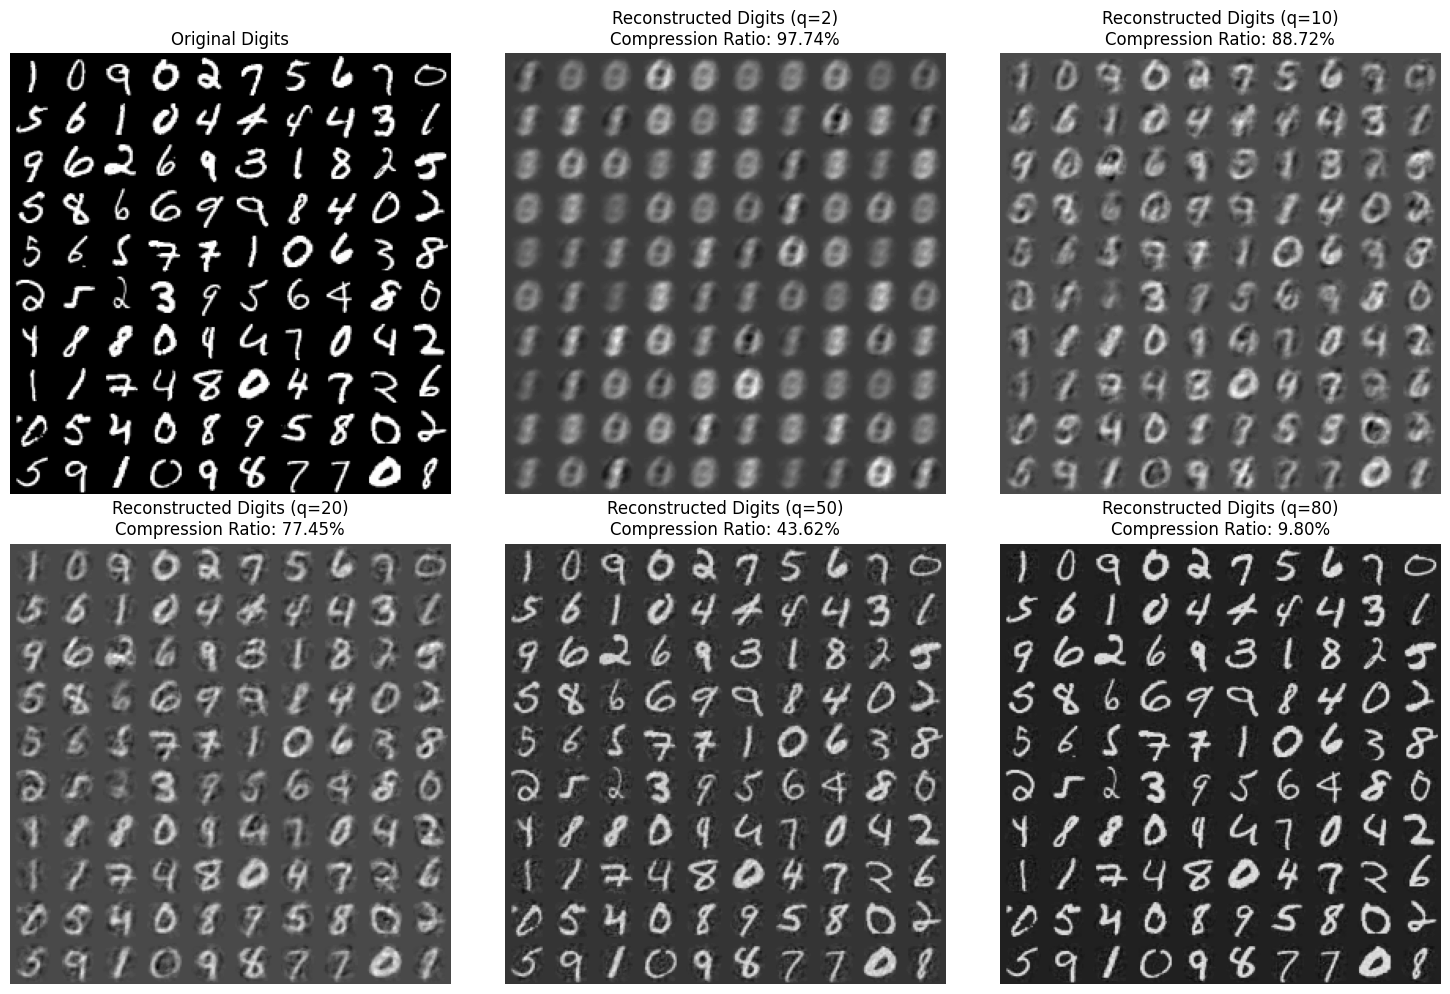

In [66]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# 載入 MNIST 數據集
mnist = loadmat("/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/mat/mnist-original.mat")
X = mnist["data"]
y = mnist["label"][0]

# 從整個數據集中隨機抽樣100個數字
random_indices = np.random.choice(X.shape[1], size=100, replace=False)
random_digits = X[:, random_indices]

# 指定 q 值
qs = [2, 10, 20, 50, 80]

# 使用 SVD 進行 Rank q 近似
U, S, VT = np.linalg.svd(random_digits, full_matrices=False)

# 創建一個 2*3 的子圖顯示原始圖像和不同 q 值下的重建圖像
plt.figure(figsize=(15, 10))

# 顯示原始圖像
plt.subplot(2, 3, 1)
original_montage = montage(random_digits, 10, 10)
plt.imshow(original_montage, cmap='gray')
plt.title("Original Digits")
plt.axis('off')

# 對於每個 q 值
for i, q in enumerate(qs):
    # 重建圖像
    reconstructed_digits = U[:, :q] @ np.diag(S[:q]) @ VT[:q, :]
    
    # 顯示重建圖像
    plt.subplot(2, 3, i+2)
    reconstructed_montage = montage(reconstructed_digits, 10, 10)
    plt.imshow(reconstructed_montage, cmap='gray')
    plt.title("Reconstructed Digits (q={})\nCompression Ratio: {:.2f}%".format(q, (1 - (U[:, :q].size + VT[:q, :].size) / random_digits.size) * 100))
    plt.axis('off')

# 調整子圖的間距
plt.tight_layout()
plt.show()


<hr>

#### <strong><font color=cornflowerblue>Lesson7</font></strong> 

以下程式碼將寫入一段motage程式，並且讀入耶魯人臉影像。

In [67]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import os

def show_montage(X, n, m, h, w):
    '''
    X: 影像資料矩陣，每行代表一張影像
    n,m: 每張影像的大小 nxm
    h,w: 建立一個蒙太奇圖陣，大小 figsize=(w,h)
    '''
    fig, axes = plt.subplots(h, w, figsize=(w, h))
    if X.shape[1] < w * h: 
        X = np.c_[X, np.zeros((X.shape[0], w*h - X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n).T, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

D = scipy.io.loadmat('/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/mat/allFaces.mat')
X = D['faces'] # 32256 x 2410, each column represents an image y = np.ndarray.flatten(D[’nfaces’])
y = np.ndarray.flatten(D['nfaces'])#分別代表每個人的張數
m = int(D['m']) # 168
n = int(D['n']) # 192
n_persons = int(D['person']) # 38

/var/folders/q1/b0ndsqyd5hldwkvkh_hw1d180000gn/T/ipykernel_1260/1828792872.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(D['m']) # 168
/var/folders/q1/b0ndsqyd5hldwkvkh_hw1d180000gn/T/ipykernel_1260/1828792872.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(D['n']) # 192
/var/folders/q1/b0ndsqyd5hldwkvkh_hw1d180000gn/T/ipykernel_1260/1828792872.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n_persons = int(D['person']) # 38


以下程式碼為顯示人臉影像資料中的38個人臉影像，並以一個 4x10 的 motage 圖呈現。

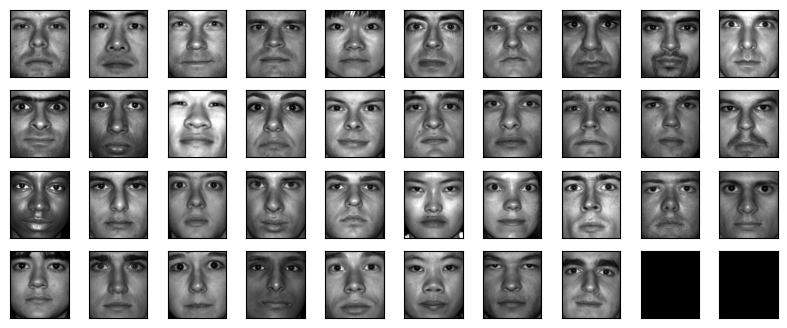

In [68]:
all_diff_persons = np.zeros((m*n, n_persons)) 
cnt = 0
for i in range(n_persons):
   all_diff_persons[:,i] = X[:,cnt] 
   cnt = cnt + y[i]
show_montage(all_diff_persons, n, m, 4,10)

<hr>

#### <strong><font color=cornflowerblue>Lesson7習題1-1</font></strong> 

5 張經過加密的影像圖，其加密的方式採 Yale Faces 38 人 2410 張人臉圖像矩陣 X 的 SVD，取 U 作為影像加密的工具。

且這 5 張影像圖的主成分採 q=2000，矩陣 X 先減去平均值，再執行 SVD 得到 U。而目標為將影像圖解密還原出來。

以下程式碼為對中心化後的 X_avg 進行 SVD 分解。

In [108]:
from numpy.linalg import svd
avgFace = np.mean(X, axis=1)
X_avg = X - avgFace.reshape(-1, 1)
U, E, VT = svd(X_avg, full_matrices=False)

以下程式碼為將加密的csv影像資料檔從一維影像資料轉換為二維陣列，以便顯示解密前的影像。

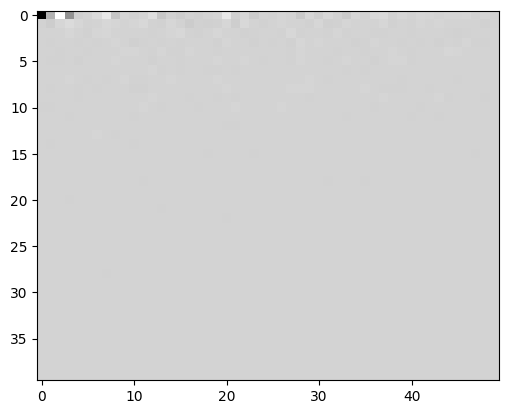

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 讀入影像
locked_image = pd.read_csv('/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/Excel_file/五張加密的影像_2024.csv')
# 抽取第一個影像資料
first_locked_image = np.array(locked_image.iloc[:, 0])
# 將資料轉換為二維陣列
plt.imshow(first_locked_image.reshape(40, 50), cmap='gray')
plt.show()

以下程式碼是使用前q個主成分對加密的影像資料進行降維和重構，再將解密後的影像顯示出來。

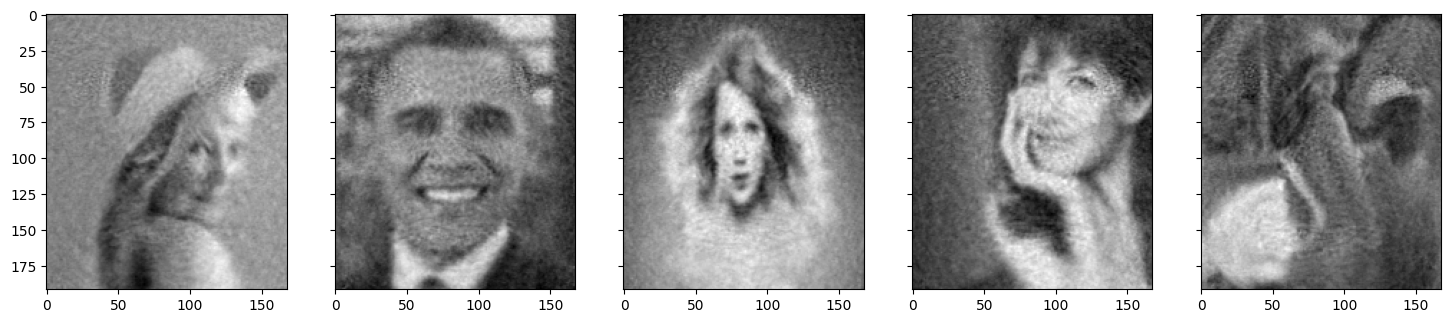

In [110]:
# 使用前q個主成分
q = 2000 
# 設定影像的大小
m, n = 168, 192 
# 降維與重新建構
Xq = np.dot(U[:, 0:q], locked_image)
# 顯示影像
fig, ax = plt.subplots(1, 5, figsize=(18, 18), sharey=True)

for i in range(5):
    ax[i].imshow(Xq[:, i].reshape(m, n).T, cmap='gray')


<hr>

#### <strong><font color=cornflowerblue>Lesson7習題1-2</font></strong> 

讀入 5 張照片（大小同 Yale Faces 的 192×168 或自行 Resize），含人臉、水果、風景 … 等進行加密後再解密，觀察解密後的影像的效果，是否人臉的表現比較好？

並觀察其他非人臉影像，如風景影像，是否能透過由人臉建構的特徵 U 加密？也就是解密後能否看到原圖模樣？

以下程式碼將讀入5張影像，分別包含人像、狐狸、奇異果、巨石陣、汽車。

將5張影像讀入並以子圖方式呈現，再將影像轉換成灰度影像再呈現。

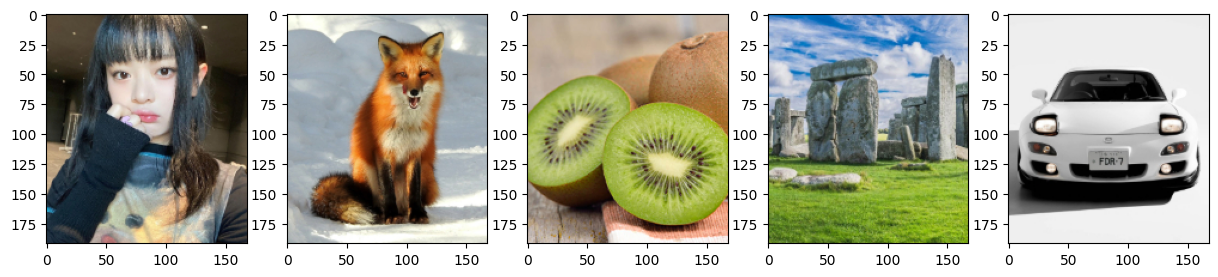

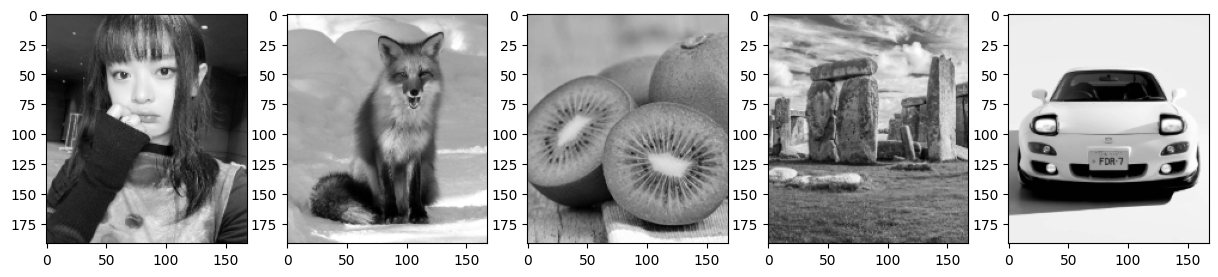

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = '/Users/andrewhsu/Downloads/hanni.jpg' 
x1_hanni = mpimg.imread(img)
img = '/Users/andrewhsu/Downloads/fox.jpg' 
x2_fox = mpimg.imread(img)
img = '/Users/andrewhsu/Downloads/kiwi.jpg' 
x3_kiwi = mpimg.imread(img)
img = '/Users/andrewhsu/Downloads/rock.jpg'
x4_rock = mpimg.imread(img)
img = '/Users/andrewhsu/Downloads/rx7.jpg' 
x5_rx7 = mpimg.imread(img)
imgs=[x1_hanni,x2_fox,x3_kiwi,x4_rock,x5_rx7]
#原圖
fig,ax=plt.subplots(1,5,figsize=(15,15))
for r,i in enumerate(imgs):
    ax[r].imshow(i)
plt.show()
#黑白
fig,ax=plt.subplots(1,5,figsize=(15,15))
for r,i in enumerate(imgs):
   if len(i.shape) > 2:
    i = np.mean(i, axis=2) 
    ax[r].imshow(i,cmap='gray')
plt.show()

以下程式碼是要確保讀取的影像都是灰度影像，目的是為了確保後續的處理能夠正確地應用於所有的影像，而不需要考慮到彩色影像和灰度影像之間的差異。

In [164]:
if len(x1_hanni.shape) > 2:
    x1_hanni = np.mean(x1_hanni, axis=2)
if len(x2_fox.shape) > 2:
    x2_fox = np.mean(x2_fox, axis=2)
if len(x3_kiwi.shape) > 2:
    x3_kiwi= np.mean(x3_kiwi, axis=2)
if len(x4_rock.shape) > 2:
    x4_rock = np.mean(x4_rock, axis=2)
if len(x5_rx7.shape) > 2:
    x5_rx7 = np.mean(x5_rx7, axis=2)

以下程式碼將五張影像分別應用於 SVD ，接著使用不同數量的主成分對這些影像進行重構，並顯示重構後的影像。

可以觀察到，在 q=5 時，5 張影像幾乎都看不出原圖。但是增加到 q=10 時，人像的重構影像已經大約可以看出輪廓，其餘影像則依舊不清楚。

而在 q=20 時，人像又更為清晰了，且奇異果、汽車的輪廓也逐漸顯示出來。再來到 q=100 時，所有重構影像都可以看出原圖了。

最後使用 q=168 ，重構影像則幾乎接近原圖了。

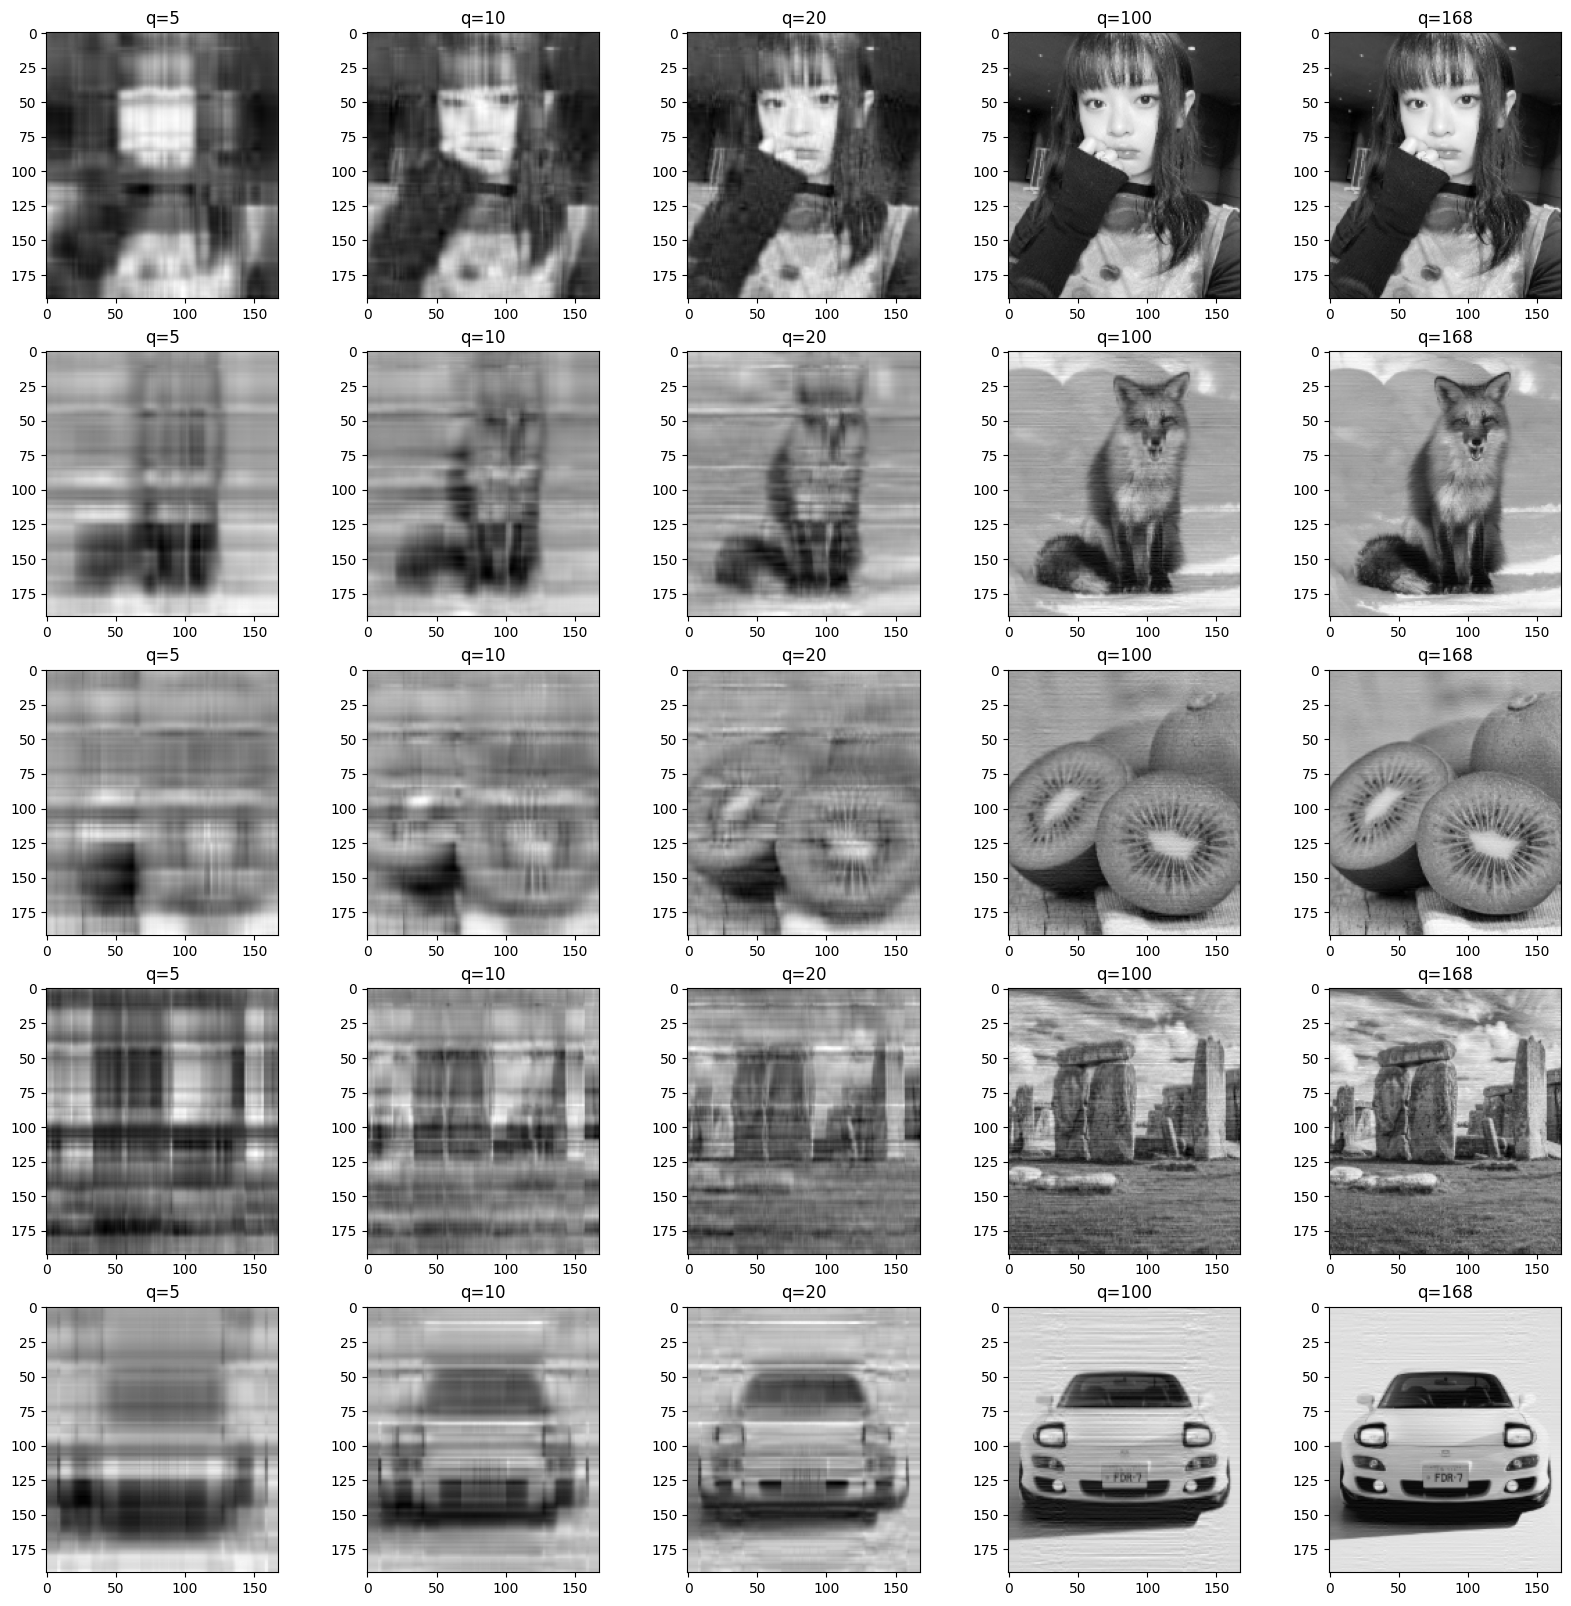

In [131]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt


U, E, VT = svd(x1_hanni, full_matrices = False)
q=np.array([5,10,20,100,168]).astype('int') ##使用不同主成分數量
pic=[x1_hanni,x2_fox,x3_kiwi,x4_rock,x5_rx7]

plt.figure(figsize=(20,20))
for i,r in enumerate(pic):
    for w,d in enumerate(q):
        Xq =U[:,:d]@ (U[:,:d].T @ np.array(r))
        plt.subplot(5,5,(i*len(q))+w+1)
        plt.title('q={}'.format(d))
        plt.imshow(Xq,cmap='gray')
plt.show()

以下程式碼將透過第一張人像圖像將 5 張影像進行加密與解密，且 5 張影像分別呈現原圖、加密後影像以及使用所有主成分解密後的圖像。

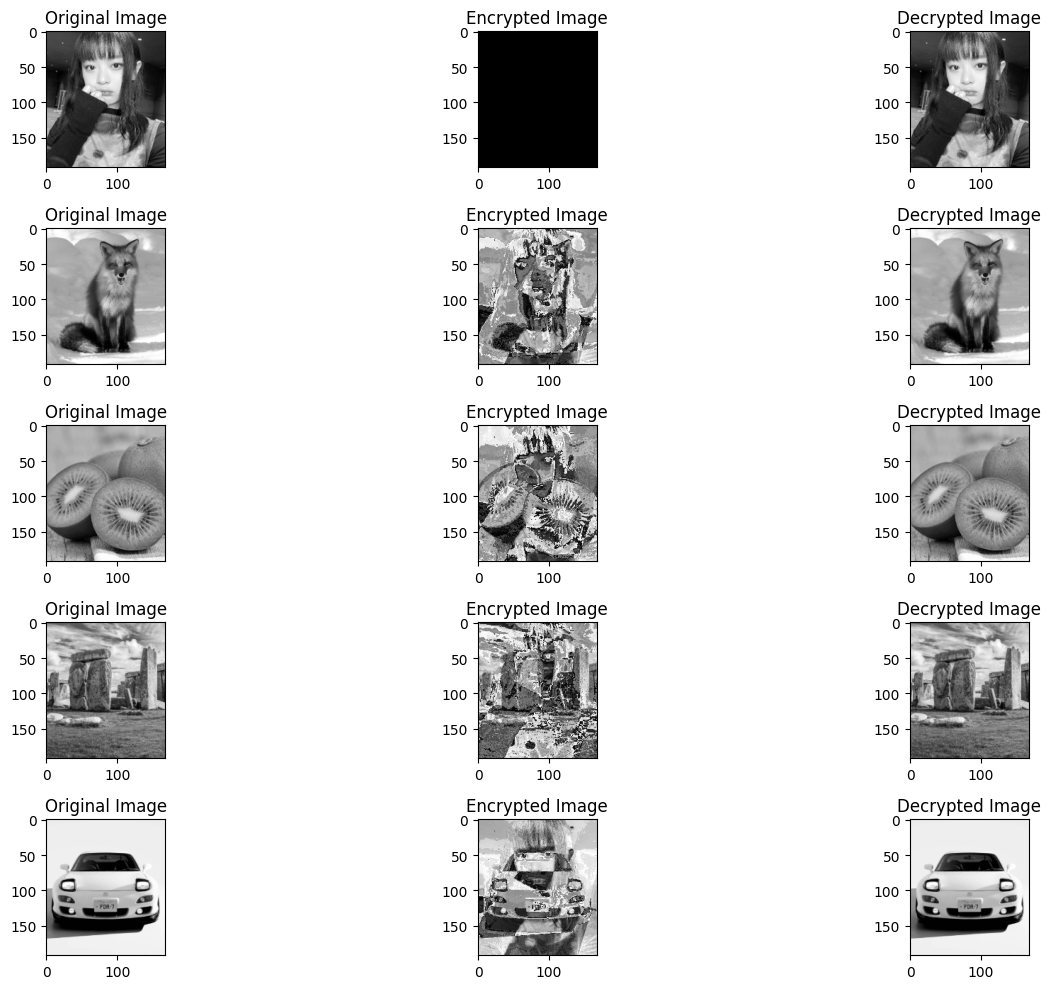

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 加密函數
def encrypt_image(image, key):
    # 確保圖像和密鑰的數據類型是兼容的
    image = image.astype(np.int64)
    key = key.astype(np.int64)
    # 對圖像執行位異或運算
    encrypted_image = np.bitwise_xor(image, key)
    return encrypted_image

# 解密函數
def decrypt_image(encrypted_image, key):
    # 確保加密的圖像和密鑰的數據類型是兼容的
    encrypted_image = encrypted_image.astype(np.int64)
    key = key.astype(np.int64)
    # 對加密的圖像執行位異或運算
    decrypted_image = np.bitwise_xor(encrypted_image, key)
    return decrypted_image

images = [x1_hanni, x2_fox, x3_kiwi, x4_rock, x5_rx7]

# 加密
encrypted_images = [encrypt_image(image, x1_hanni) for image in images]

# 解密
decrypted_images = [decrypt_image(encrypted_image, x1_hanni) for encrypted_image in encrypted_images]

# 顯示原始圖像、加密圖像和解密圖像
plt.figure(figsize=(15, 10))

for i in range(5):
    plt.subplot(5, 3, i*3 + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title('Original Image')

    plt.subplot(5, 3, i*3 + 2)
    plt.imshow(encrypted_images[i], cmap='gray')
    plt.title('Encrypted Image')

    plt.subplot(5, 3, i*3 + 3)
    plt.imshow(decrypted_images[i], cmap='gray')
    plt.title('Decrypted Image')

plt.tight_layout()
plt.show()



以下程式碼將透過第一張人像圖像將人像圖像進行加密與解密，且分別選取不同的 q 值下的結果。

可以觀察到 q 值選取的越小加密後的影像較能夠看出原本的輪擴。但解密後的影像則隨著 q 值越小而越失真。

而 q 值選擇 168 時，加密後的結果完全看不出原圖，但是解密後幾乎接近原圖。

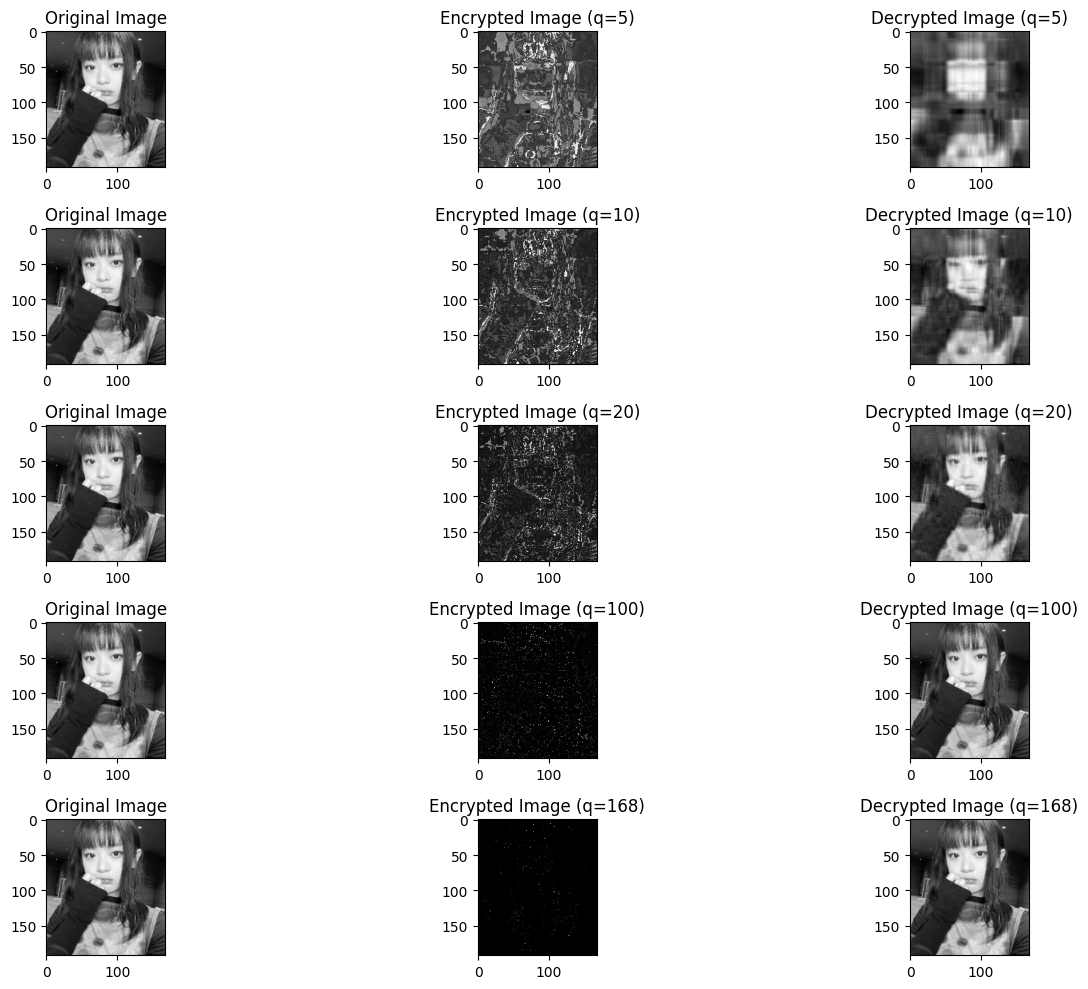

In [148]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt

# 加密函數
def encrypt_image(image, key, q):
    # 計算 SVD
    U, E, VT = svd(image, full_matrices=False)
    # 壓縮圖像
    compressed_image = U[:, :q] @ np.diag(E[:q]) @ VT[:q, :]
    # 對壓縮的圖像進行異或運算
    encrypted_image = np.bitwise_xor(compressed_image.astype(np.int64), key.astype(np.int64))
    return encrypted_image.astype(image.dtype)  # 將結果轉換為原始圖像的數據類型

# 解密函數
def decrypt_image(encrypted_image, key, q):
    # 對加密的圖像進行異或運算
    decrypted_image = np.bitwise_xor(encrypted_image.astype(np.int64), key.astype(np.int64))
    # 重建圖像
    U, E, VT = svd(decrypted_image, full_matrices=False)
    reconstructed_image = U[:, :q] @ np.diag(E[:q]) @ VT[:q, :]
    return reconstructed_image.astype(encrypted_image.dtype)  # 將結果轉換為原始圖像的數據類型

# 定義 q 值列表
qs = [5, 10, 20, 100, 168]

# 加密
encrypted_images = [encrypt_image(x1_hanni, x1_hanni, q) for q in qs]

# 解密
decrypted_images = [decrypt_image(encrypted_image, x1_hanni, q) for encrypted_image, q in zip(encrypted_images, qs)]

# 顯示結果
plt.figure(figsize=(15, 10))

for i in range(5):
    plt.subplot(5, 3, i*3 + 1)
    plt.imshow(x1_hanni, cmap='gray')
    plt.title('Original Image')

    plt.subplot(5, 3, i*3 + 2)
    plt.imshow(encrypted_images[i], cmap='gray')
    plt.title(f'Encrypted Image (q={qs[i]})')

    plt.subplot(5, 3, i*3 + 3)
    plt.imshow(decrypted_images[i], cmap='gray')
    plt.title(f'Decrypted Image (q={qs[i]})')

plt.tight_layout()
plt.show()


以下程式碼則是以人臉圖像對所有圖像進行加密，並顯示不同 q 值選擇下解密後的影像。

觀察後發現，其他非人臉影像是可以透過人像進行加密的，且解密後還能夠還原原本的樣子。

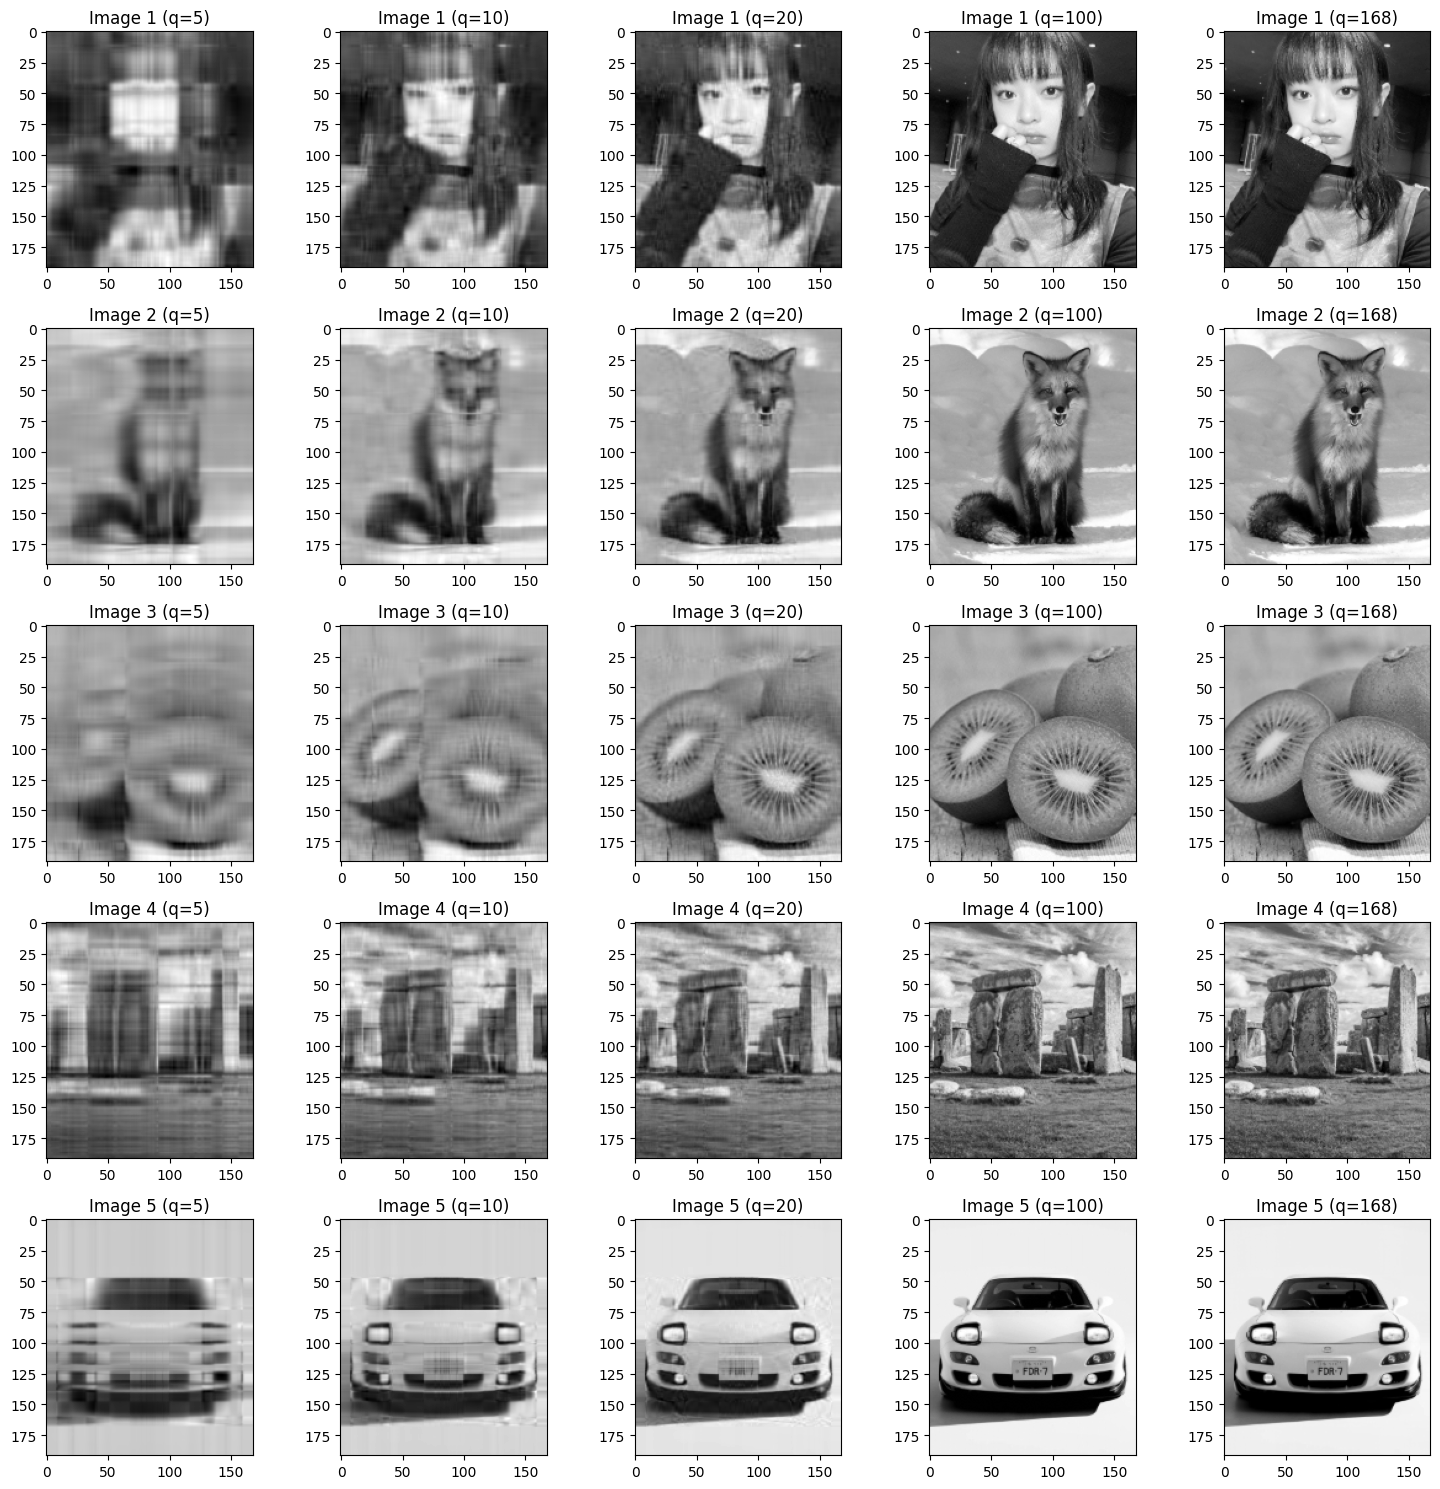

In [150]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt

# 加密函數
def encrypt_image(image, key, q):
    # 計算 SVD
    U, E, VT = svd(image, full_matrices=False)
    # 壓縮圖像
    compressed_image = U[:, :q] @ np.diag(E[:q]) @ VT[:q, :]
    # 對壓縮的圖像進行異或運算
    encrypted_image = np.bitwise_xor(compressed_image.astype(np.int64), key.astype(np.int64))
    return encrypted_image.astype(image.dtype)  # 將結果轉換為原始圖像的數據類型

# 解密函數
def decrypt_image(encrypted_image, key, q):
    # 對加密的圖像進行異或運算
    decrypted_image = np.bitwise_xor(encrypted_image.astype(np.int64), key.astype(np.int64))
    # 重建圖像
    U, E, VT = svd(decrypted_image, full_matrices=False)
    reconstructed_image = U[:, :q] @ np.diag(E[:q]) @ VT[:q, :]
    return reconstructed_image.astype(encrypted_image.dtype)  # 將結果轉換為原始圖像的數據類型

# 定義 q 值列表
qs = [5, 10, 20, 100, 168]

# 定義影像列表
images = [x1_hanni, x2_fox, x3_kiwi, x4_rock, x5_rx7]

# 加密和解密
results = []

for image in images:
    encrypted_images = [encrypt_image(image, image, q) for q in qs]
    decrypted_images = [decrypt_image(encrypted_image, image, q) for encrypted_image, q in zip(encrypted_images, qs)]
    results.append(decrypted_images)

# 顯示結果
plt.figure(figsize=(15, 15))

for i in range(len(images)):
    for j in range(len(qs)):
        plt.subplot(len(images), len(qs), i*len(qs) + j + 1)
        plt.imshow(results[i][j], cmap='gray')
        plt.title(f'Image {i+1} (q={qs[j]})')

plt.tight_layout()
plt.show()
